In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.set_theme(style="whitegrid")

In [10]:
""" 
Visualize results from embeddings of models with speed features included
"""
path = r'' # use your path
all_files = glob.glob(os.path.join("./results" , "full_evaluation_speed/*.csv"))

dfs = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    dfs.append(df)


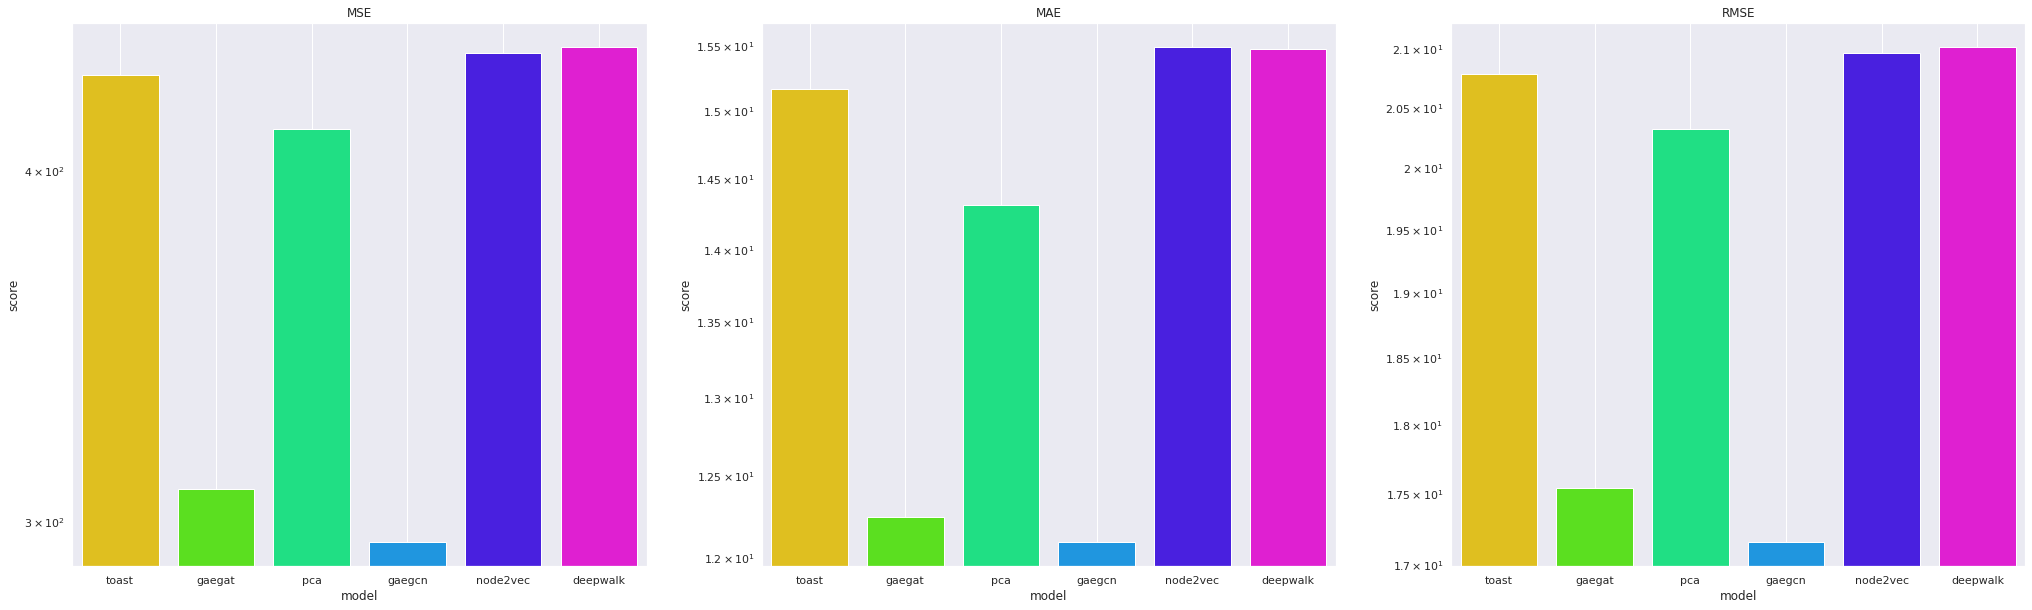

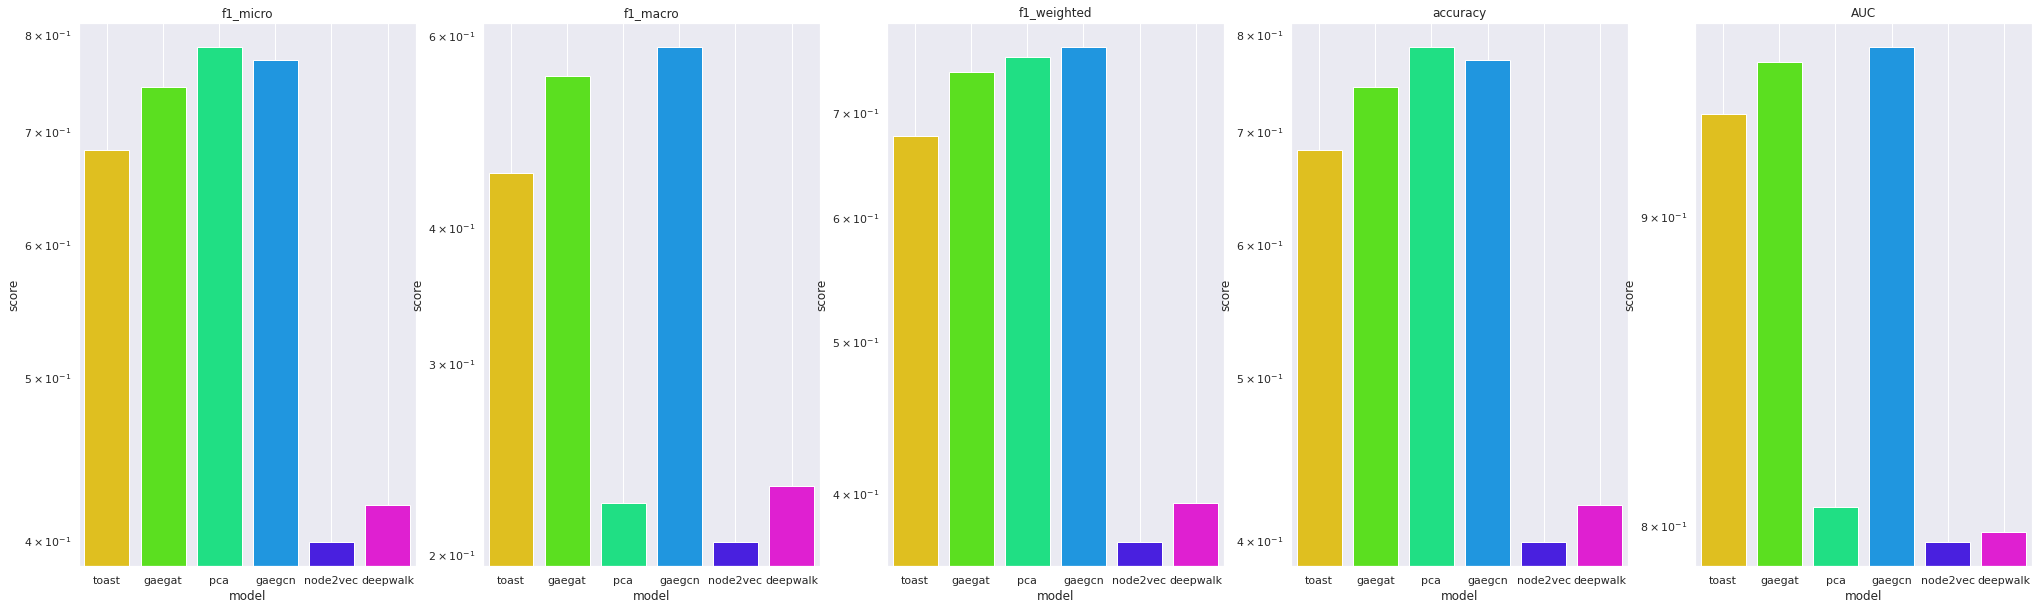

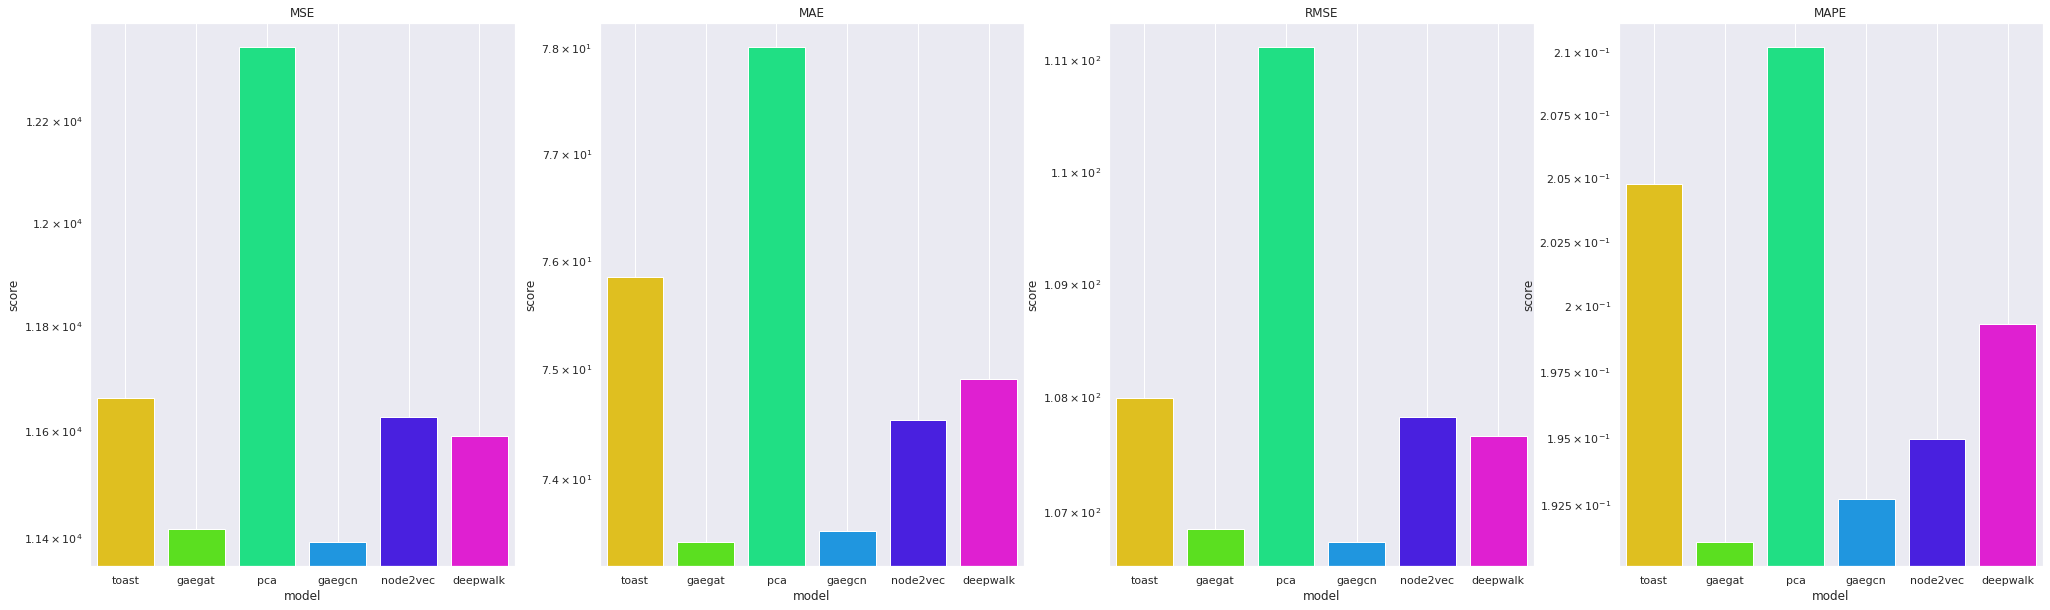

In [63]:
sns.set_style("darkgrid")

for df in dfs:
    # convert to barplot friendly format
    df = df.set_index("model").stack().reset_index().rename(columns={"level_1": "score_func", 0: "score"})
    score_funcs = df["score_func"].unique()
    fig, ax = plt.subplots(1, len(score_funcs), figsize=(35,10))
    for i, sf in enumerate(score_funcs):
        g = sns.barplot(
            data=df[df["score_func"]==sf], 
            x="model", y="score",
            ci="sd", palette="hsv", alpha=1, ax=ax[i]
        )
        g.set_yscale("log")
        g.set_title(sf)
        ax[i].grid()
        #g.despine(left=True)
        #g.set_axis_labels("score function", "score")

In [2]:
"""
Analysis of k-evaluation
"""
all_files = glob.glob(os.path.join("./results" , "gtn_k_eva/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    df["k"] = df['model'].str.split('_').str[2]
    df["type"] = df['model'].str.split('_').str[3]
    dfs.append(df)

./results/gtn_k_eva/roadclf.csv
./results/gtn_k_eva/traveltime_1.csv
./results/gtn_k_eva/traveltime_2.csv
./results/gtn_k_eva/traveltime.csv
./results/gtn_k_eva/meanspeed_1.csv
./results/gtn_k_eva/destination.csv
./results/gtn_k_eva/nextlocation.csv
./results/gtn_k_eva/meanspeed_2.csv
./results/gtn_k_eva/meanspeed.csv


<AxesSubplot:xlabel='k', ylabel='MAE'>

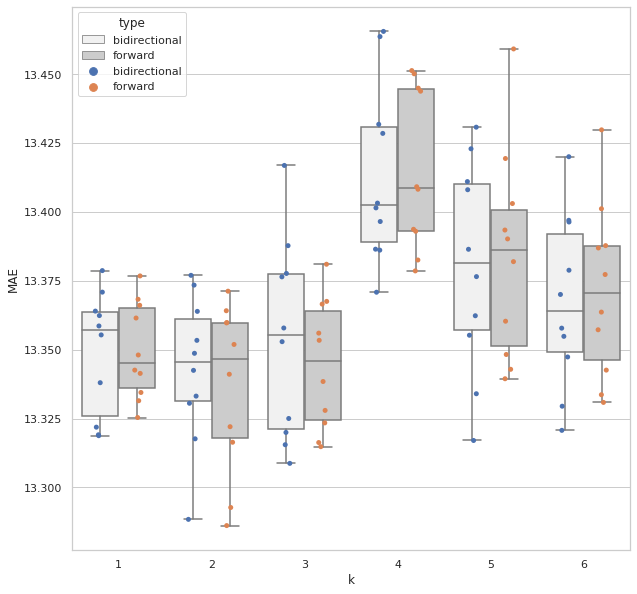

In [39]:
import numpy as np
# v = dfs[-1].groupby(["type", "k"])["MAE"].agg(["mean", "var"]).reset_index()
# v["mean"] = v["mean"].round(3)
# print(v.to_latex())
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="k", y="MAE", hue="type", data=dfs[-1], whis=np.inf, color=".8")
sns.stripplot(x="k", y="MAE", hue="type", data=dfs[-1], dodge=True)

In [2]:
# Ablation plots
all_files = glob.glob(os.path.join("./results" , "gtn_ablation/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    dfs.append(df)

./results/gtn_ablation/meanspeed.csv
./results/gtn_ablation/destination.csv
./results/gtn_ablation/traveltime.csv
./results/gtn_ablation/nextlocation.csv
./results/gtn_ablation/roadclf.csv


[Text(0, 0, '0.593'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0.58'),
 Text(0, 0, '0.592')]

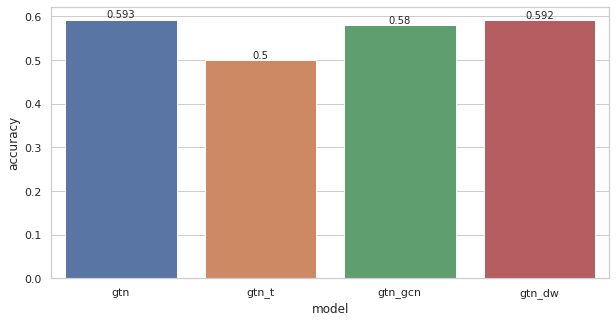

In [4]:
plt.figure(figsize=(10,5))
df = dfs[-2]
df["accuracy"] = df["accuracy"].round(3)
ax = sns.barplot(x="model", y="accuracy", data=df)
ax.bar_label(ax.containers[0])
# ax.set(ylim=(10, 15))

In [15]:
""" 
Ablation Study GTC & Traj2vec
"""
# Ablation plots
all_files = glob.glob(os.path.join("./results" , "gtc_traj2vec_ablation/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    dfs.append(df)

./results/gtc_traj2vec_ablation/meanspeed.csv
./results/gtc_traj2vec_ablation/roadclf.csv
./results/gtc_traj2vec_ablation/timetravel.csv
./results/gtc_traj2vec_ablation/nextlocation.csv
./results/gtc_traj2vec_ablation/destination.csv


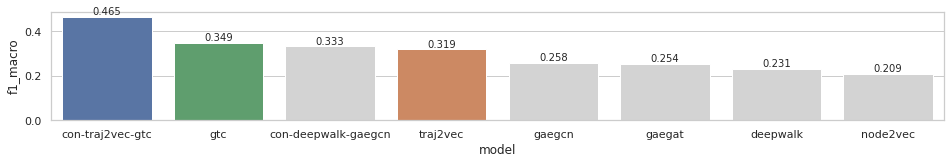

In [27]:
idx = 1
dfs[idx] = dfs[idx].round(3)
colors = sns.color_palette(n_colors=3)
dfs[idx].sort_values("f1_macro", inplace=True, ascending=False)
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(16,2))
color_map = {"con-traj2vec-gtc": colors[0], "traj2vec": colors[1], "gtc": colors[2]}
clrs = [color_map[x] if x in ["con-traj2vec-gtc", "traj2vec", "gtc"] else 'lightgrey' for x in dfs[idx]["model"]]
sns.barplot(x="model", y="f1_macro", data=dfs[idx], palette=clrs, ax=ax)
# sns.barplot(x="model", y="f1_macro", data=dfs[0][dfs[0]["type"]=="conv"], palette="viridis", ax=ax[0])
# sns.barplot(x="model", y="f1_macro", data=dfs[0][dfs[0]["type"]=="walk"], palette="viridis", ax=ax[1])
# sns.barplot(x="model", y="f1_macro", data=dfs[0][dfs[0]["type"]=="concatination"], palette="viridis", ax=ax[2])
ax.bar_label(ax.containers[0])
types = ["Convolution", "Walk", "Concatination"]
# for i, a in enumerate(ax):
#     # a.set_title(f"{types[i]}")
#     a.bar_label(a.containers[0])
#     # a.set_xlabel("")
#ax.set(ylim=(10, 15))

In [15]:
""" 
Trajectory feature study gtc 
"""
# Ablation plots
all_files = glob.glob(os.path.join("./results" , "gtc_feature_eval/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    dfs.append(df)

./results/gtc_feature_eval/roadclf.csv
./results/gtc_feature_eval/meanspeed.csv
./results/gtc_feature_eval/destination.csv
./results/gtc_feature_eval/nextlocation.csv
./results/gtc_feature_eval/traveltime.csv


[Text(0, 0, '0.434'),
 Text(0, 0, '0.42'),
 Text(0, 0, '0.438'),
 Text(0, 0, '0.454')]

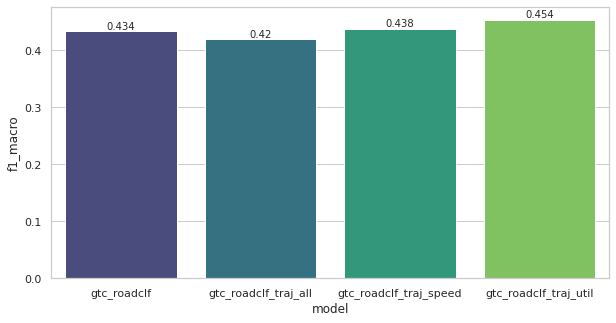

In [25]:
dfs[0] = dfs[0].round(3)
# dfs[0].sort_values("accuracy", inplace=True, ascending=False)
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(10,5))
sns.barplot(x="model", y="f1_macro", data=dfs[0], palette="viridis", ax=ax)
# sns.barplot(x="model", y="f1_macro", data=dfs[0][dfs[0]["type"]=="conv"], palette="viridis", ax=ax[0])
# sns.barplot(x="model", y="f1_macro", data=dfs[0][dfs[0]["type"]=="walk"], palette="viridis", ax=ax[1])
# sns.barplot(x="model", y="f1_macro", data=dfs[0][dfs[0]["type"]=="concatination"], palette="viridis", ax=ax[2])
ax.bar_label(ax.containers[0])
# ax.set(ylim=(13,13.5))

In [18]:
"""
Generate main result tables
"""
all_files = glob.glob(os.path.join("./results" , "final_eva_sf/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    dfs.append(df)

./results/final_eva_sf/meanspeed.csv
./results/final_eva_sf/timetravel.csv
./results/final_eva_sf/nextlocation.csv
./results/final_eva_sf/destination.csv
./results/final_eva_sf/roadclf.csv


In [20]:
cols = ["accuracy"] # ["f1_macro", "accuracy", "AUC"]# ["MAE", "RMSE", "MSE"]
df = dfs[3]
df = df.groupby("Unnamed: 0")[cols].agg(["mean", "std"]).reset_index()
df = df.reindex([6, 0, 5, 2, 1, 7, 8, 4, 9, 3])
df = df.round(3)
df.columns = df.columns.map('|'.join).str.strip('|')
for c in cols:
    df[c] = df[f"{c}|mean"].astype(str) + " pm " + df[f"{c}|std"].astype(str)

df = df[["Unnamed: 0"] + cols]

# df = df[["Unnamed: 0", "f1_macro", "accuracy", "AUC"]] # roadclf
# df = df[["Unnamed: 0", "MAE", "RMSE", "MSE"]]

print(df.to_latex(index=False))

\begin{tabular}{ll}
\toprule
Unnamed: 0 &       accuracy \\
\midrule
       pca & 0.047 pm 0.002 \\
  deepwalk &  0.11 pm 0.003 \\
  node2vec &  0.11 pm 0.004 \\
    gaegcn & 0.061 pm 0.006 \\
    gaegat &  0.09 pm 0.004 \\
       rfn & 0.091 pm 0.002 \\
   srn2vec & 0.098 pm 0.002 \\
      hrnr & 0.109 pm 0.007 \\
     toast & 0.089 pm 0.003 \\
       gtn & 0.119 pm 0.004 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2884/3703822411.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))
